# Estrategias

In [1]:
import QuantLib as ql

In [2]:
precio_activo = 440 #Spot (S)

volatilidad = 0.3394  #Volatilidad Implicita anualizada (sigma)
tasa_interes = 0.0013 #tasa libre de riesgo anualizada (r)
tasa_dividendos =  0.075 #tasa de dividendos anualizada (q)


In [3]:
#Expiracion el 16 de octubre de 2020
fecha_expiracion = ql.Date(16, 10, 2020)
#Expiracion el 16 de diciembre de 2020
#fecha_expiracion_2 = ql.Date(16, 12, 2020)

#Valuacion el 16 de octubre de 2020
fecha_valuacion = ql.Date(6, 8, 2020)

ql.Settings.instance().evaluationDate = fecha_valuacion

#Calendario y convencion de daycount
day_count = ql.Actual365Fixed()
calendario = ql.UnitedStates()


In [4]:
S = ql.SimpleQuote(precio_activo)
objeto_spot = ql.QuoteHandle(S)

r = ql.SimpleQuote(tasa_interes)
objeto_tasa_interes = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                            ql.QuoteHandle(r), 
                                                        day_count))
q = ql.SimpleQuote(tasa_dividendos)
objeto_tasa_dividendos = ql.YieldTermStructureHandle(ql.FlatForward(fecha_valuacion, 
                                                      ql.QuoteHandle(q), 
                                                      day_count))

sigma = ql.SimpleQuote(volatilidad)
objeto_volatilidad = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(fecha_valuacion, 
                                                                 calendario, 
                                                                 ql.QuoteHandle(sigma), 
                                                             day_count))

proceso_BSM = ql.BlackScholesMertonProcess(objeto_spot, 
                                           objeto_tasa_dividendos, 
                                           objeto_tasa_interes, 
                                           objeto_volatilidad)

modelo_BS = ql.AnalyticEuropeanEngine(proceso_BSM)


## I) Straddle

In [5]:
#Opcion 1
#Call con Strike 450
precio_ejercicio_Str = 450 #Strike (K)


tipo_opcion_1 = ql.Option.Call #Tipo de opcion (CALL o PUT)
payoff_1 = ql.PlainVanillaPayoff(tipo_opcion_1, precio_ejercicio_Str)
ejercicio = ql.EuropeanExercise(fecha_expiracion)
opcion_1 = ql.VanillaOption(payoff_1, ejercicio)

#Opcion 2
#Put con Strike
tipo_opcion_2 = ql.Option.Put #Tipo de opcion (CALL o PUT)
payoff_2 = ql.PlainVanillaPayoff(tipo_opcion_2, precio_ejercicio_Str)
opcion_2 = ql.VanillaOption(payoff_2, ejercicio)




In [6]:
opcion_1.setPricingEngine(modelo_BS)
opcion_2.setPricingEngine(modelo_BS)


In [7]:
#Seteo de Matplotlib
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


Sensibilidad del precio con respecto al spot

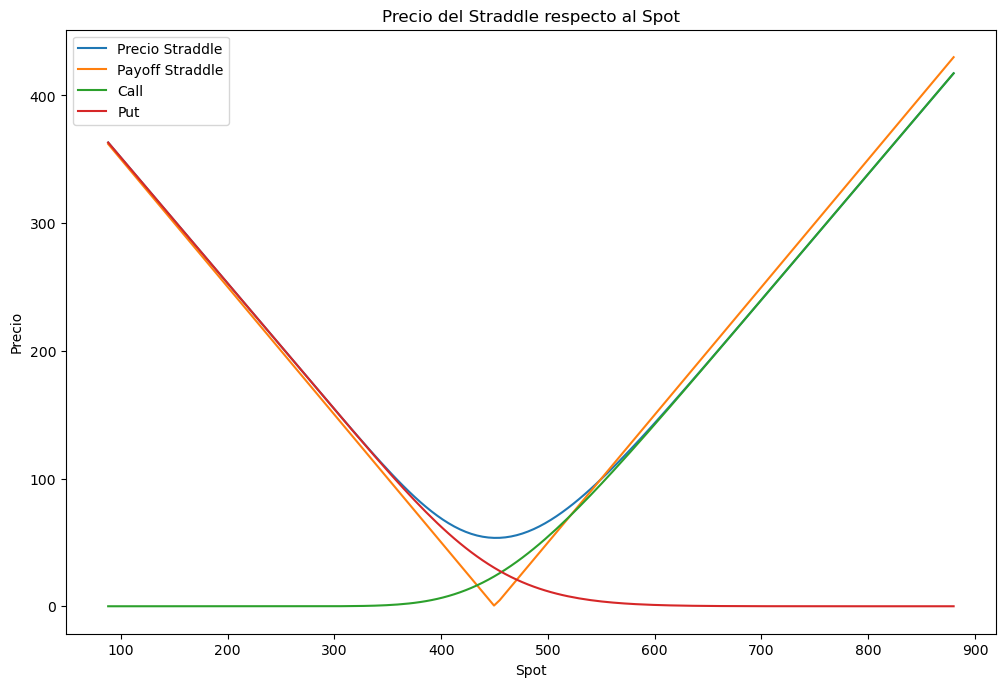

In [8]:
S.setValue(precio_activo)
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 150)
NPV_straddle_vec=[]
payoff_straddle_vec=[]
call=[]
put=[]
for S_i in S_vec:
    S.setValue(S_i)
    temp_1 = opcion_1.NPV()
    temp_2 = opcion_2.NPV()
    call.append(temp_1)
    put.append(temp_2)
    NPV_straddle_vec.append( temp_1 + temp_2)
    payoff_straddle_vec.append(max(S_i-precio_ejercicio_Str,0)+ max(precio_ejercicio_Str - S_i,0))

plt.plot(S_vec, NPV_straddle_vec, label = 'Precio Straddle')
plt.plot(S_vec, payoff_straddle_vec, label = 'Payoff Straddle')
plt.plot(S_vec, call, label = 'Call')
plt.plot(S_vec, put, label = 'Put')


plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio')
plt.title('Precio del Straddle respecto al Spot')
    
plt.show()

#Vuelvo
S.setValue(precio_activo)

Delta con respecto al spot

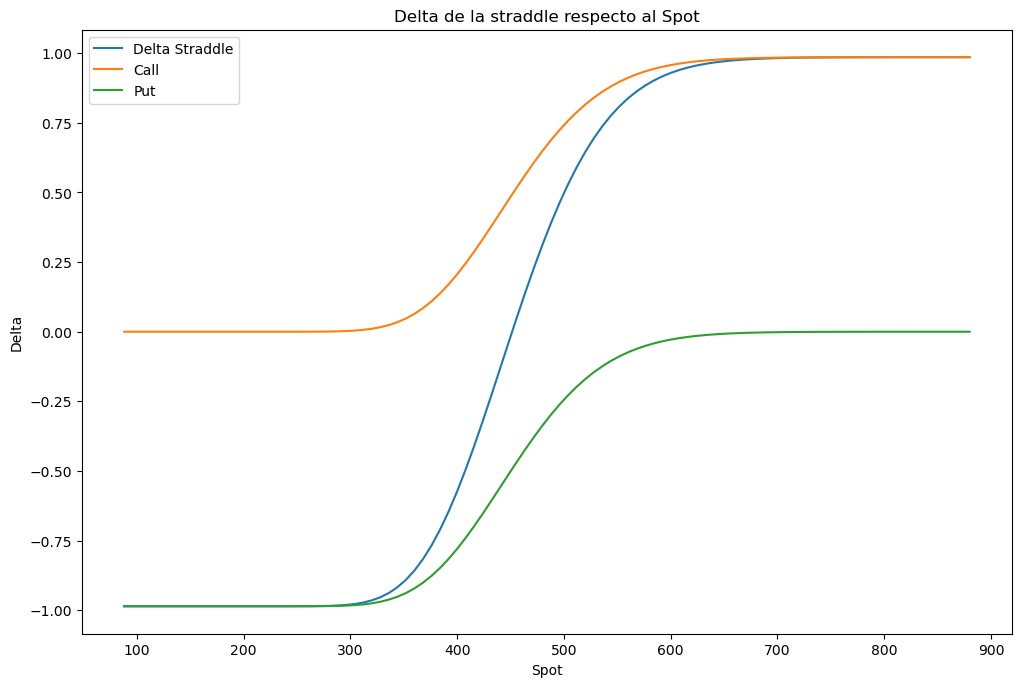

In [9]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_straddle_vec=[]
call=[]
put=[]
    
for S_i in S_vec:
    S.setValue(S_i)
    temp_1 = opcion_1.delta()
    temp_2 = opcion_2.delta()
    call.append(temp_1)
    put.append(temp_2)
    
    NPV_straddle_vec.append( temp_1 + temp_2)

plt.plot(S_vec, NPV_straddle_vec, label = 'Delta Straddle')
plt.plot(S_vec, call, label = 'Call')
plt.plot(S_vec, put, label = 'Put')
plt.legend()

plt.xlabel('Spot')
plt.ylabel('Delta')
plt.title('Delta de la straddle respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

Gamma con respecto al spot

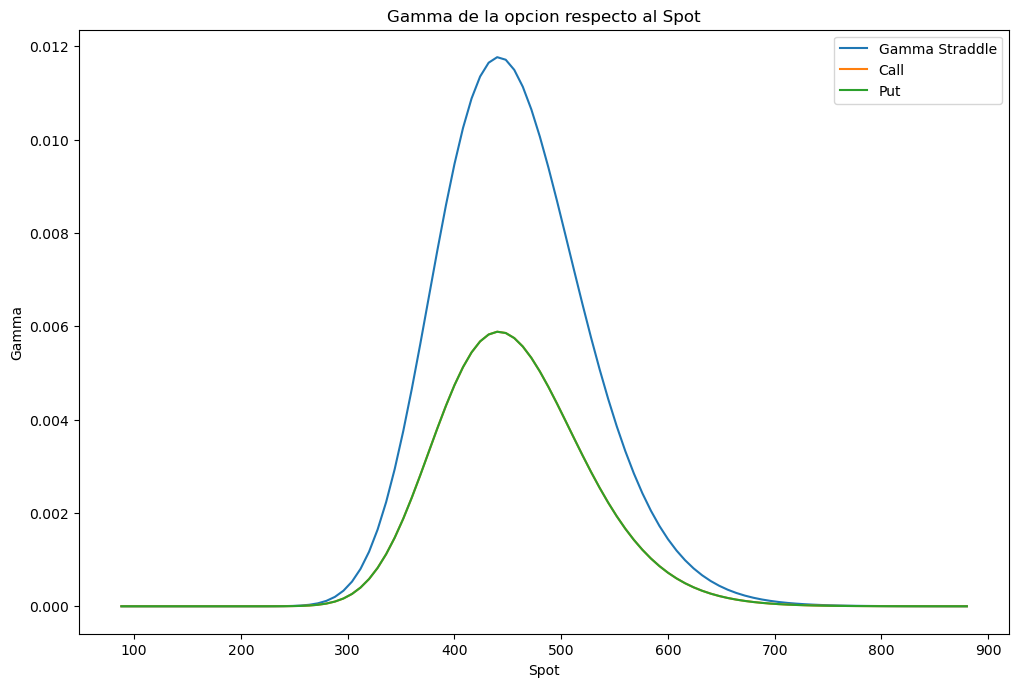

In [10]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_straddle_vec=[]
call=[]
put=[]

for S_i in S_vec:
    S.setValue(S_i)
    temp_1 = opcion_1.gamma()
    temp_2 = opcion_2.gamma()
    call.append(temp_1)
    put.append(temp_2)
    NPV_straddle_vec.append( temp_1 + temp_2)

plt.plot(S_vec, NPV_straddle_vec, label = 'Gamma Straddle')
plt.plot(S_vec, call, label = 'Call')
plt.plot(S_vec, put, label = 'Put')
plt.legend()

plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.title('Gamma de la opcion respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

Vega con respecto al spot

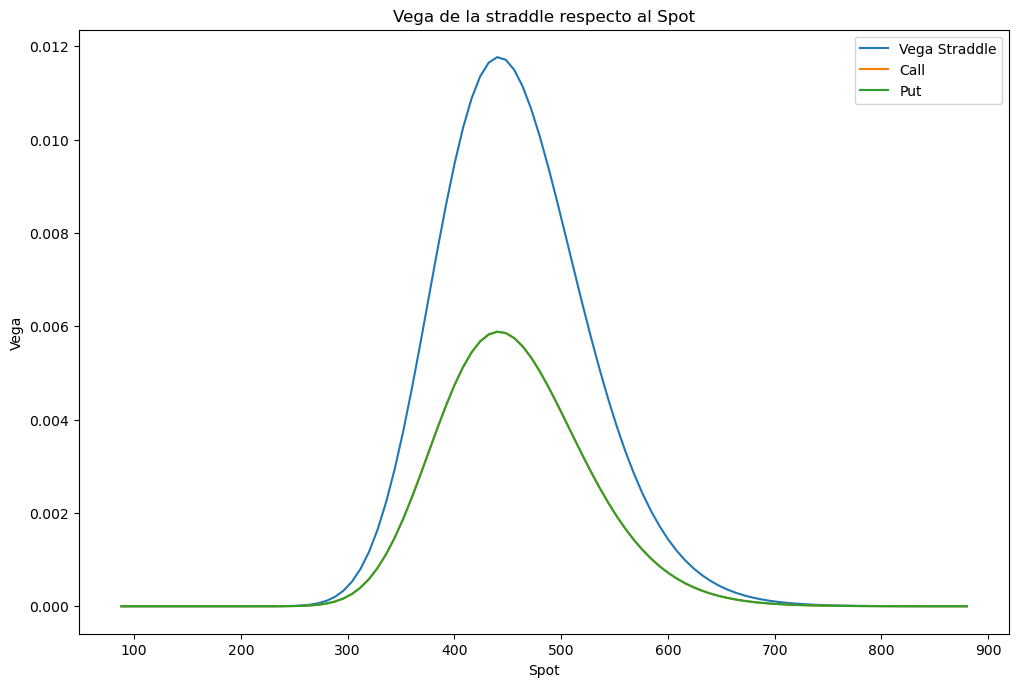

In [11]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_straddle_vec=[]
call=[]
put=[]

for S_i in S_vec:
    S.setValue(S_i)
    temp_1 = opcion_1.gamma()
    temp_2 = opcion_2.gamma()
    call.append(temp_1)
    put.append(temp_2)
    NPV_straddle_vec.append( temp_1 + temp_2)


plt.plot(S_vec, NPV_straddle_vec, label = 'Vega Straddle')
plt.plot(S_vec, call, label = 'Call')
plt.plot(S_vec, put, label = 'Put')
plt.legend()

plt.xlabel('Spot')
plt.ylabel('Vega')
plt.title('Vega de la straddle respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo

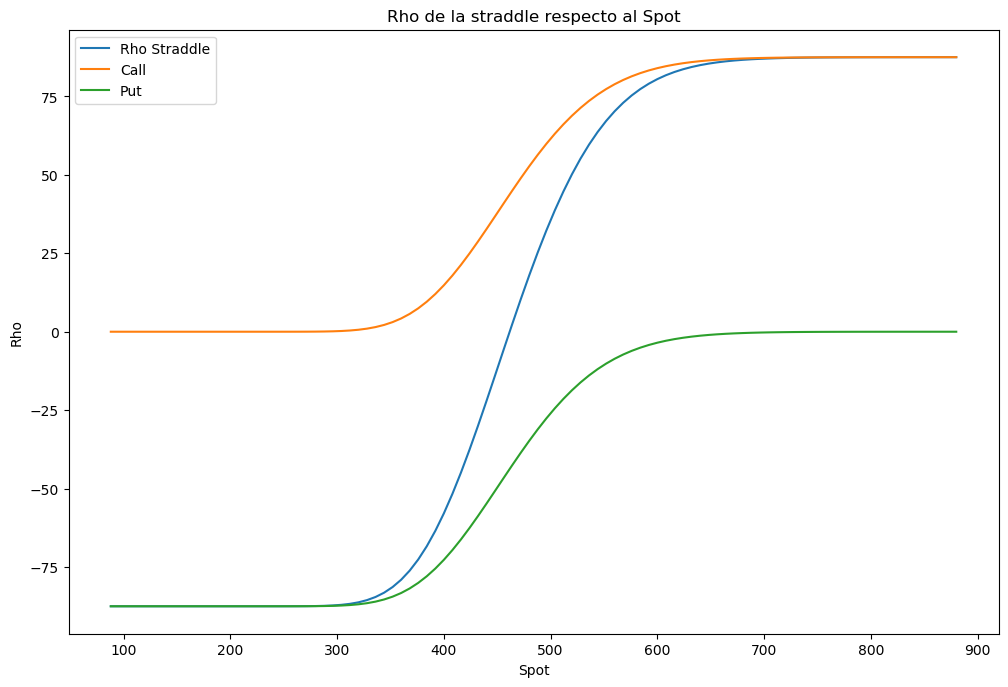

In [12]:
S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_straddle_vec=[]
call=[]
put=[]

for S_i in S_vec:
    S.setValue(S_i)
    temp_1 = opcion_1.rho()
    temp_2 = opcion_2.rho()
    call.append(temp_1)
    put.append(temp_2)
    NPV_straddle_vec.append( temp_1 + temp_2)


plt.plot(S_vec, NPV_straddle_vec, label = 'Rho Straddle')
plt.plot(S_vec, call, label = 'Call')
plt.plot(S_vec, put, label = 'Put')
plt.legend()

plt.xlabel('Spot')
plt.ylabel('Rho')
plt.title('Rho de la straddle respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo


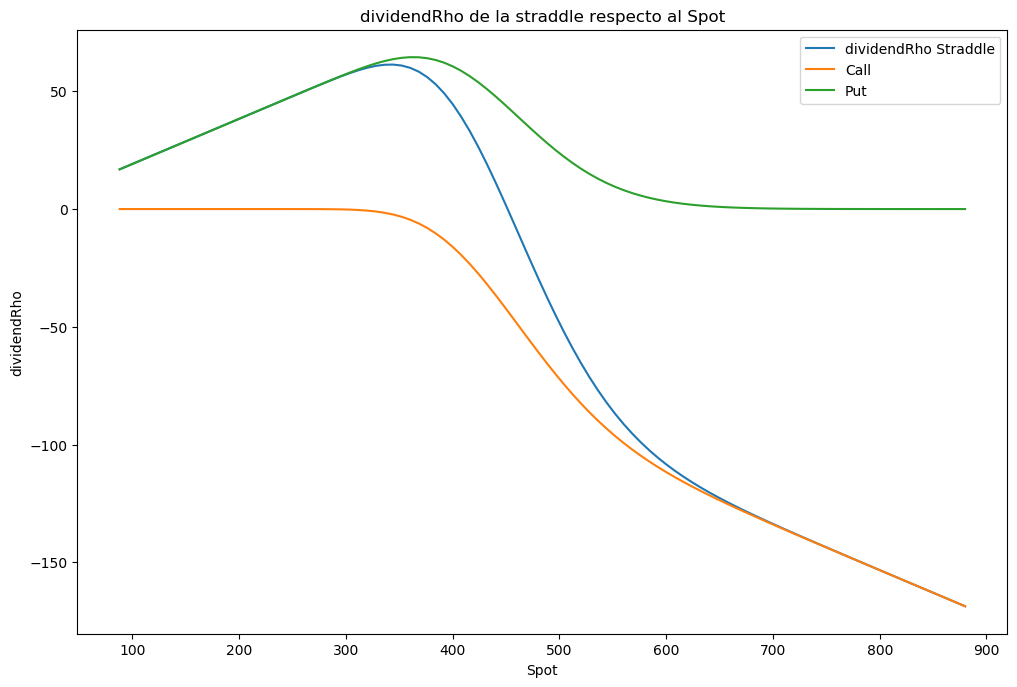

In [13]:


S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_straddle_vec=[]
call=[]
put=[]

for S_i in S_vec:
    S.setValue(S_i)
    temp_1 = opcion_1.dividendRho()
    temp_2 = opcion_2.dividendRho()
    call.append(temp_1)
    put.append(temp_2)
    NPV_straddle_vec.append( temp_1 + temp_2)


plt.plot(S_vec, NPV_straddle_vec, label = 'dividendRho Straddle')
plt.plot(S_vec, call, label = 'Call')
plt.plot(S_vec, put, label = 'Put')
plt.legend()

plt.xlabel('Spot')
plt.ylabel('dividendRho')
plt.title('dividendRho de la straddle respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo



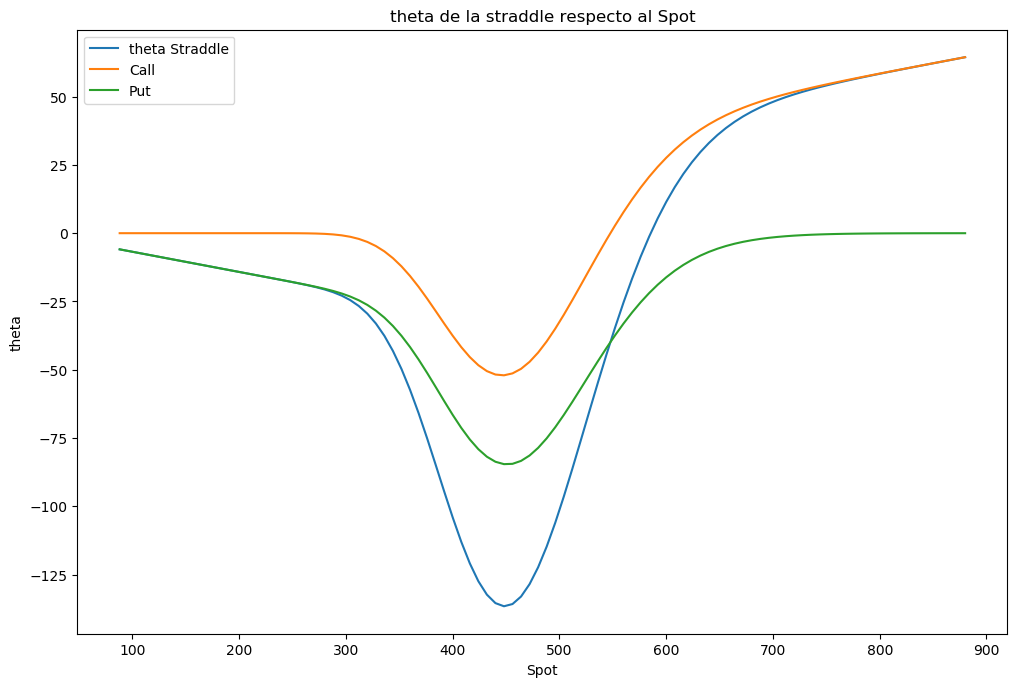

In [14]:


S_vec = np.linspace(precio_activo*.2, precio_activo*2, 100)
NPV_straddle_vec=[]
call=[]
put=[]

for S_i in S_vec:
    S.setValue(S_i)
    temp_1 = opcion_1.theta()
    temp_2 = opcion_2.theta()
    call.append(temp_1)
    put.append(temp_2)
    NPV_straddle_vec.append( temp_1 + temp_2)


plt.plot(S_vec, NPV_straddle_vec, label = 'theta Straddle')
plt.plot(S_vec, call, label = 'Call')
plt.plot(S_vec, put, label = 'Put')
plt.legend()

plt.xlabel('Spot')
plt.ylabel('theta')
plt.title('theta de la straddle respecto al Spot')
    
plt.show()
S.setValue(precio_activo)
#Vuelvo


## II) Butterfly

In [12]:
precio_ejercicio_B1 = 350 #Strike (K)
precio_ejercicio_B2 = 450 #Strike (K)
precio_ejercicio_B3 = 550 #Strike (K)

#Opcion 1
#Call con Strike 1
tipo_opcion_B1 = ql.Option.Call #Tipo de opcion (CALL o PUT)
payoff_B1 = ql.PlainVanillaPayoff(tipo_opcion_B1, precio_ejercicio_B1)
opcion_B1 = ql.VanillaOption(payoff_B1, ejercicio)

#Opcion 2
#Call con Strike 2
tipo_opcion_B2 = ql.Option.Call #Tipo de opcion (CALL o PUT)
payoff_B2 = ql.PlainVanillaPayoff(tipo_opcion_B2, precio_ejercicio_B2)
opcion_B2 = ql.VanillaOption(payoff_B2, ejercicio)

#Opcion 2
#Call con Strike 2
tipo_opcion_B3 = ql.Option.Call #Tipo de opcion (CALL o PUT)
payoff_B3 = ql.PlainVanillaPayoff(tipo_opcion_B3, precio_ejercicio_B3)
opcion_B3 = ql.VanillaOption(payoff_B3, ejercicio)



In [13]:
opcion_B1.setPricingEngine(modelo_BS)
opcion_B2.setPricingEngine(modelo_BS)
opcion_B3.setPricingEngine(modelo_BS)


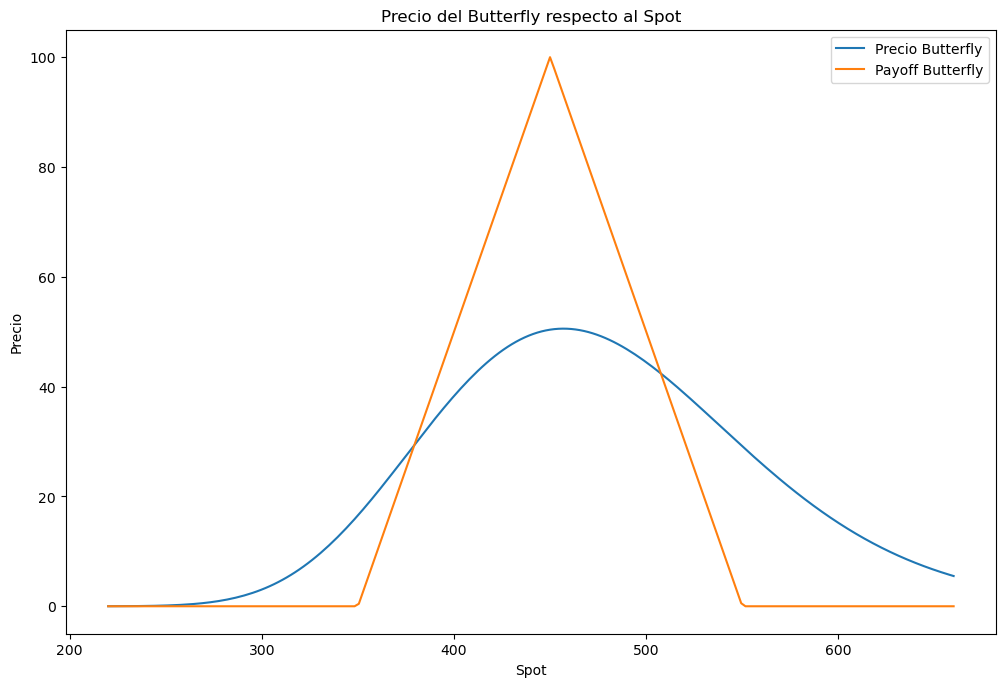

In [14]:
S.setValue(precio_activo)
S_vec = np.linspace(precio_activo*.5, precio_activo*1.5, 200)
NPV_butterfly_vec=[]
payoff_butterfly_vec=[]
call1=[]
call2=[]
call3=[]
for S_i in S_vec:
    S.setValue(S_i)
    temp_B1 = opcion_B1.NPV()
    temp_B2 = opcion_B2.NPV()
    temp_B3 = opcion_B3.NPV()
    
    call1.append(temp_B1)
    call2.append(-2*temp_B2)
    call3.append(temp_B3)
    
    NPV_butterfly_vec.append(temp_B1 - 2*temp_B2 + temp_B3)
    payoff_butterfly_vec.append(max(S_i-precio_ejercicio_B1,0) -2*max(S_i-precio_ejercicio_B2,0) + max(S_i-precio_ejercicio_B3,0) )

plt.plot(S_vec, NPV_butterfly_vec, label = 'Precio Butterfly')
plt.plot(S_vec, payoff_butterfly_vec, label = 'Payoff Butterfly')
#plt.plot(S_vec, call1, label = 'Call 1')
#plt.plot(S_vec, call2, label = '-2 Call 2')
#plt.plot(S_vec, call3, label = 'Call 3')


plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio')
plt.title('Precio del Butterfly respecto al Spot')
    
plt.show()

#Vuelvo
S.setValue(precio_activo)

## III) Put Bear Spread

In [15]:
precio_ejercicio_BS1 = 420 #Strike (K)
precio_ejercicio_BS2 = 480 #Strike (K)


#Opcion 1
#Call con Strike 1
tipo_opcion_BS1 = ql.Option.Put #Tipo de opcion (CALL o PUT)
payoff_BS1 = ql.PlainVanillaPayoff(tipo_opcion_BS1, precio_ejercicio_BS1)
opcion_BS1 = ql.VanillaOption(payoff_BS1, ejercicio)

#Opcion 2
#Call con Strike 2
tipo_opcion_BS2 = ql.Option.Put #Tipo de opcion (CALL o PUT)
payoff_BS2 = ql.PlainVanillaPayoff(tipo_opcion_BS2, precio_ejercicio_BS2)
opcion_BS2 = ql.VanillaOption(payoff_BS2, ejercicio)


In [16]:
opcion_BS1.setPricingEngine(modelo_BS)
opcion_BS2.setPricingEngine(modelo_BS)


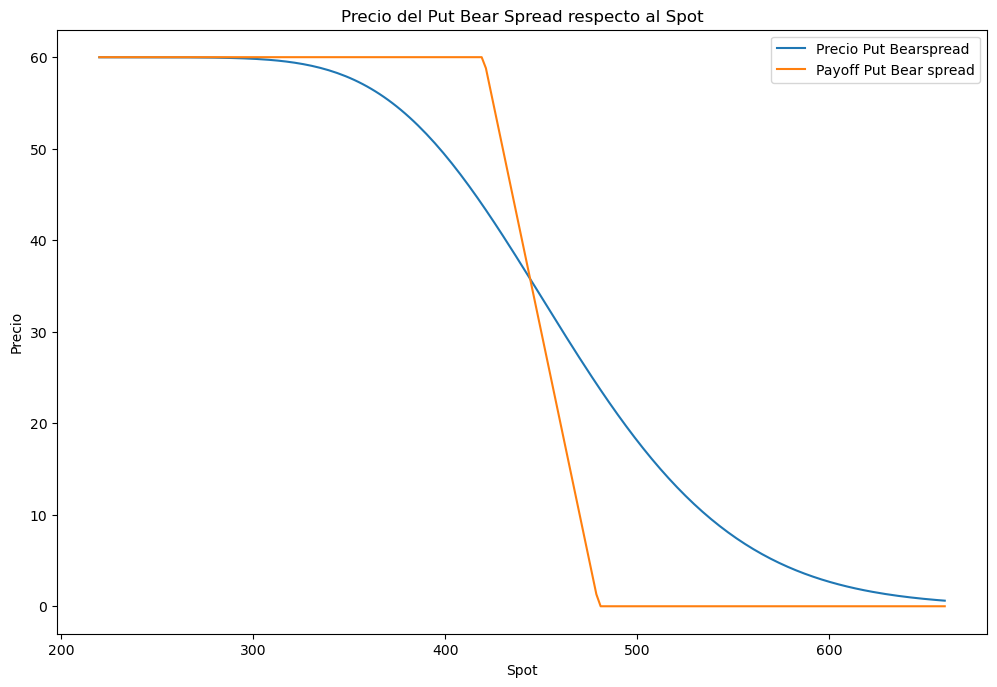

In [17]:
S.setValue(precio_activo)
S_vec = np.linspace(precio_activo*.5, precio_activo*1.5, 200)
NPV_bearspread_vec=[]
payoff_bearspread_vec=[]
put1=[]
put2=[]

for S_i in S_vec:
    S.setValue(S_i)
    temp_BS1 = opcion_BS1.NPV()
    temp_BS2 = opcion_BS2.NPV()
    
    
    put1.append(-temp_BS1)
    put2.append(temp_BS2)
    
    NPV_bearspread_vec.append(-temp_BS1 + temp_BS2)
    payoff_bearspread_vec.append(-max(precio_ejercicio_BS1 -S_i,0) + max(precio_ejercicio_BS2-S_i,0) )

plt.plot(S_vec, NPV_bearspread_vec, label = 'Precio Put Bearspread')
plt.plot(S_vec, payoff_bearspread_vec, label = 'Payoff Put Bear spread')
#plt.plot(S_vec, call1, label = '- Put 1')
#plt.plot(S_vec, call2, label = ' Put 2')



plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio')
plt.title('Precio del Put Bear Spread respecto al Spot')
    
plt.show()

#Vuelvo
S.setValue(precio_activo)

## IV) Calendar Bull Spread

In [18]:
precio_ejercicio_C = 480 #Strike (K)

#Expiracion el 16 de octubre de 2020
fecha_expiracion_C1 = ql.Date(16, 10, 2020)
#Expiracion el 16 de diciembre de 2020
fecha_expiracion_C2 = ql.Date(16, 12, 2020)

tipo_opcion_C = ql.Option.Call
payoff_C = ql.PlainVanillaPayoff(tipo_opcion_C, precio_ejercicio_C)

#Opcion 1
#Call convencimiento 1

ejercicio_C1 = ql.EuropeanExercise(fecha_expiracion_C1)
opcion_C1 = ql.VanillaOption(payoff_C, ejercicio_C1)
#Opcion 2
#Call con venicimento 2
ejercicio_C2 = ql.EuropeanExercise(fecha_expiracion_C2)
opcion_C2 = ql.VanillaOption(payoff_C, ejercicio_C2)


In [19]:
opcion_C1.setPricingEngine(modelo_BS)
opcion_C2.setPricingEngine(modelo_BS)


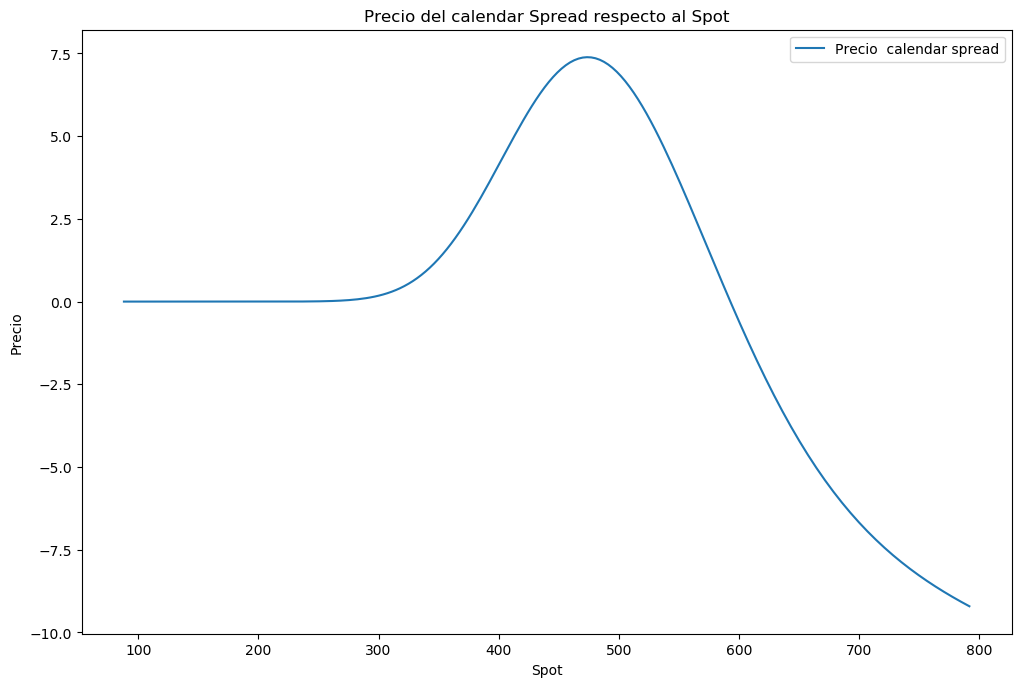

In [23]:
S.setValue(precio_activo)
S_vec = np.linspace(precio_activo*.2, precio_activo*1.8, 200)
NPV_calendar_vec=[]
payoff_calendar_vec=[]
call1=[]
call2=[]

for S_i in S_vec:
    S.setValue(S_i)
    temp_C1 = opcion_C1.NPV()
    temp_C2 = opcion_C2.NPV()
        
    call1.append(-temp_C1)
    call2.append(temp_C2)
    
    NPV_calendar_vec.append(-temp_C1 + temp_C2)
    
plt.plot(S_vec, NPV_calendar_vec, label = 'Precio  calendar spread')
#plt.plot(S_vec, payoff_calendar_vec, label = 'Payoff  calendar spread')
#plt.plot(S_vec, call1, label = '- Put 1')
#plt.plot(S_vec, call2, label = ' Put 2')



plt.legend()

plt.xlabel('Spot')
plt.ylabel('Precio')
plt.title('Precio del calendar Spread respecto al Spot')
    
plt.show()

#Vuelvo
S.setValue(precio_activo)